# Prim's Algorithm

Prim's Algorithm is a greedy algorithm that is used to find the minimum spanning tree for a undirected, weighted graph. 

Before getting started with this notebook, please ensure you have completed the notebook on [Kruskal's Algorithm](./3_kruskal.ipynb) where we introduced the idea of a minimum spanning tree.

## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Bellmann-Ford's algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="graph1"></a>
## Building the graph

To establish the implementation of the Bellmann-Ford's algorithm, we create a weighted, undirected graph which is the same graph used in the previous notebooks.

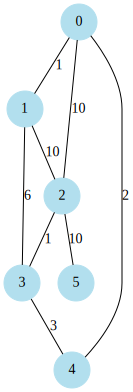

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "prims")

<a class="anchor" id="algorithm"></a>
## Prim's Algorithm

### What is a 'cut'?
>The cut property is useful to fully understand minimum spanning trees, their construction, and why a greedy algorithm--one that always selects the next best choice--works.

>The cut property states that given a collection of vertices, if the collection is divided into two sets, with no edges between the two sets that are already in the minimum spanning tree, then the shortest edge between the two sets is part of a minimum spanning tree of the graph.

>Intuitively, the cut property says that we can always make the choice of adding an edge to our minimum spanning tree simply by finding a way to connect two sets of vertices (note that we don't have to know that each set is connected internally or not; all that matters is that we can find a bridge between the two).

>The basic intuition behind why this works is that at some point, the two collections of vertices have to be linked together, and choosing a longer edge than the minimum edge would only really help if we didn't also need the shorter edge (but if we needed only the shorter edge, we wouldn't need the longer edge). 

### About the algorithm
>Prim's algorithm closely resembles Dijkstra's algorithm because they both rely on a similar approach of finding the "next closest" vertex. Prim's algorithm slowly grows a minimum spanning tree, starting from a single vertex and adding in new edges that link the partial tree to a new vertex outside of the tree. Using the cut property, we know that if we have a partial tree, then to add a new vertex to the tree, all we actually need to do is find the vertex that is closest to the tree (the elements in the tree and the elements outside the tree are the two sets in the cut property, so we just choose the smallest edge bridging the two).

>So how does this work in practice? We start out with an array of distances, d, from the minimum spanning tree for each vertex in the graph. Initially, all distances should be set to infinity (or another large number) except for the vertex that we will use to "seed" the minimum spanning tree (the first vertex in the tree). After that vertex is added to the tree, each of its neighbors will have their distances to the tree updated appropriately. The closest vertex to the minimum spanning tree should then be added to the tree, and the process of checking its neighbors to see if they can reach the tree more quickly via the new vertex than any other vertex in the tree should be repeated.

>The pseudocode for Prim's algorithm looks remarkably like the pseudocode for Dijkstra's algorithm. 

### Pseudo Code
<pre> 
1  <b>function</b> Prim(<i>G</i>):
2
3      <b>for each</b> node <i>v</i> in <i>Graph</i>:             
4          key[<i>v</i>] ← INFINITY                  
5          previous[<i>v</i>] ← UNDEFINED                 
6            
7      key[<i>0</i>] ← 0                        
8      Q = G.V
9
10      <b>while</b> <i>Q</i> is not empty:
11          <i>min_node</i> ← node in <i>Q</i> with min key[min_node] 
12                                              
13          <b>for each</b> neighbor <i>v</i> of <i>min_node</i> in <i>Q</i>: 
14              <b>if</b> <i>v</i> in <i>Q</i> <b>and</b> <i>length(<i>min_node</i>, <i>v</i>)</i> &lt; key[<i>v</i>]:               
15                  key[<i>v</i>] ← <i>length(<i>min_node</i>, <i>v</i>)</i> 
16                  previous[<i>v</i>] ← <i>min_node</i> 
17
18      <b>return</b> previous[]
</pre>

<a class="anchor" id="implementation"></a>
## Implementing Prim's algorithm

In [3]:
def minKey(key, mstNodeSet):
    minValue = sys.maxsize
    for index in range(len(key)): #same lenght as nodes in graph
        if key[index] < minValue and mstNodeSet[index] == False :
            minValue = key[index]
            minNodeIndex = index
    return minNodeIndex

def prims(graph):
    edges = graph.get_allEdges()
    
    #key values to pick minimum weight in cut 
    key = [sys.maxsize] * len(graph.get_allNodes()) 
    key[0] = 0 #Make key 0 so that it is picked as first node
    
    mstNodeSet = [False] * len(graph.get_allNodes())
    mst = [None] * len(graph.get_allNodes()) #stores MST
    mst[0] = -1 
    
    for i in range(len(graph.get_allNodes())):
        minNodeIndex = minKey(key, mstNodeSet)
        
        mstNodeSet[minNodeIndex] = True
        
        for (u, v, w) in edges:
            if u == minNodeIndex and w > 0 and mstNodeSet[v] == False and key[v] > w:
                    key[v] = w
                    mst[v] = u
                    
    adjMatrix = graphs.get_adjMatrix()
    mstEdges = []
    for i in range(1, len(mst)): 
        mstEdges.append([mst[i], i, adjMatrix[i][ mst[i] ]])
    return mstEdges

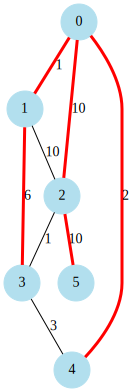

In [4]:
mstEdges = prims(graphs)
displayPath(mstEdges, "prims")

<a class="anchor" id="proof"></a>
## Proof of correctness
> Let P be a connected, weighted graph. At every iteration of Prim's algorithm, an edge must be found that connects a vertex in a subgraph to a vertex outside the subgraph. Since P is connected, there will always be a path to every vertex. The output Y of Prim's algorithm is a tree, because the edge and vertex added to tree Y are connected. Let Y1 be a minimum spanning tree of graph P. If Y1=Y then Y is a minimum spanning tree. Otherwise, let e be the first edge added during the construction of tree Y that is not in tree Y1, and V be the set of vertices connected by the edges added before edge e. Then one endpoint of edge e is in set V and the other is not. Since tree Y1 is a spanning tree of graph P, there is a path in tree Y1 joining the two endpoints. As one travels along the path, one must encounter an edge f joining a vertex in set V to one that is not in set V. Now, at the iteration when edge e was added to tree Y, edge f could also have been added and it would be added instead of edge e if its weight was less than e, and since edge f was not added, we conclude that

>    w ( f ) ≥ w ( e ) . {\displaystyle w(f)\geq w(e).} w(f)\geq w(e).

> Let tree Y2 be the graph obtained by removing edge f from and adding edge e to tree Y1. It is easy to show that tree Y2 is connected, has the same number of edges as tree Y1, and the total weights of its edges is not larger than that of tree Y1, therefore it is also a minimum spanning tree of graph P and it contains edge e and all the edges added before it during the construction of set V. Repeat the steps above and we will eventually obtain a minimum spanning tree of graph P that is identical to tree Y. This shows Y is a minimum spanning tree. The minimum spanning tree allows for the first subset of the sub-region to be expanded into a smaller subset X, which we assume to be the minimum. 

<a class="anchor" id="references"></a>
## Reference

- [1] Leiserson, Charles Eric, Ronald L. Rivest, Thomas H. Cormen, and Clifford Stein. Introduction to algorithms. Chapter 23. Vol. 6. Cambridge, MA: MIT press, 2001.
- [2] Prim's algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Prim%27s_algorithm)
- [3] Implementation of the Prim's Algorithm from [Geeks for Geeks](https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/)
- [4] Alex Allain's post on Prim's Algorithm on [cprogramming.com](https://www.cprogramming.com/tutorial/computersciencetheory/mst.html)
- [5] Minimum Spanning Trees Lecture Slides from [Princeton](https://algs4.cs.princeton.edu/lectures/43MinimumSpanningTrees-2x2.pdf)